#### 1.4.2 celltypist

In [2]:
import celltypist
import scanpy as sc

##### 1.4.2.1 model train

###### 1.4.2.1.1 BCatlas

In [ ]:
# ref: A single-cell and spatially resolved atlas of human breast cancer
bc_atlas_ref = sc.read_h5ad('/home/zhepan/Reference/BCatlas/BRCA4.h5ad')
bc_atlas_ref

In [ ]:
sc.pp.normalize_total(bc_atlas_ref, target_sum = 1e4)
sc.pp.log1p(bc_atlas_ref)

In [ ]:
sc.pp.highly_variable_genes(bc_atlas_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
bc_atlas_ref.obs.groupby('celltype_subset').apply(len)

In [ ]:
sampled_cell_index = celltypist.samples.downsample_adata(bc_atlas_ref, mode = 'each', n_cells = 1000, by = 'celltype_subset', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

In [ ]:
bc_atlas_ref[sampled_cell_index].obs.groupby('celltype_major').apply(len)

In [ ]:
# gene_index = np.argpartition(np.abs(model_fs.classifier.coef_), -300, axis = 1)[:, -300:]
# gene_index = np.unique(gene_index)
# print(f"Number of genes selected: {len(gene_index)}")

In [ ]:
%%time
#model = celltypist.train(bc_atlas_ref[sampled_cell_index, bc_atlas_ref.var.highly_variable], 'celltype_major', check_expression = False, n_jobs = 10, max_iter = 500)
#model.write('/home/zhepan/Reference/celltypist/celltype_major_from_BCatlas.pkl')
#model = celltypist.train(bc_atlas_ref[sampled_cell_index, bc_atlas_ref.var.highly_variable], 'celltype_minor', check_expression = False, n_jobs = 10, max_iter = 1000)
#model.write('/home/zhepan/Reference/celltypist/celltype_minor_from_BCatlas.pkl')
model = celltypist.train(bc_atlas_ref[sampled_cell_index, bc_atlas_ref.var.highly_variable], 'celltype_subset', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/celltype_subset_from_BCatlas.pkl')

###### 1.4.2.1.2 HBCA

In [ ]:
# ref: A spatially resolved single-cell genomic atlas of the adult human breast
hbca = sc.read_h5ad('/home/zhepan/Reference/BCatlas/HBCA.h5ad')
hbca

In [ ]:
#sc.pp.normalize_total(hbca, target_sum = 1e4)
#sc.pp.log1p(hbca)
sc.pp.highly_variable_genes(hbca, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sampled_cell_index = celltypist.samples.downsample_adata(hbca, mode = 'each', n_cells = 1000, by = 'author_cell_type', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

In [ ]:
hbca[sampled_cell_index].obs.groupby('broad_cell_type').apply(len)

In [ ]:
%%time
#model = celltypist.train(hbca[sampled_cell_index, hbca.var.highly_variable], 'broad_cell_type', check_expression = False, n_jobs = 10, max_iter = 100)
#model.write('/home/zhepan/Reference/celltypist/broad_cell_type_from_HBCA.pkl')
#model = celltypist.train(hbca[sampled_cell_index, hbca.var.highly_variable], 'cell_type', check_expression = False, n_jobs = 10, max_iter = 500)
#model.write('/home/zhepan/Reference/celltypist/cell_type_from_HBCA.pkl')
model = celltypist.train(hbca[sampled_cell_index, hbca.var.highly_variable], 'author_cell_type', check_expression = False, n_jobs = 10, max_iter = 500)
model.write('/home/zhepan/Reference/celltypist/author_cell_type_from_HBCA.pkl')

In [ ]:
hbca_sn = sc.read_h5ad('/home/zhepan/Reference/BCatlas/HBCA_sn.h5ad')
hbca_sn

In [ ]:
#sc.pp.normalize_total(hbca_sn, target_sum = 1e4)
#sc.pp.log1p(hbca_sn)
sc.pp.highly_variable_genes(hbca_sn, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
pd.crosstab(hbca_sn.obs['cell_type'], hbca_sn.obs['author_cell_type'])

In [ ]:
sampled_cell_index = celltypist.samples.downsample_adata(hbca_sn, mode = 'each', n_cells = 5000, by = 'author_cell_type', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

In [ ]:
hbca_sn[sampled_cell_index].obs.groupby('cell_type').apply(len)

In [ ]:
%%time
model = celltypist.train(hbca_sn[sampled_cell_index, hbca_sn.var.highly_variable], 'cell_type', check_expression = False, n_jobs = 10, max_iter = 500)
model.write('/home/zhepan/Reference/celltypist/cell_type_from_HBCAsn.pkl')

###### 1.4.2.1.3 GTEx

In [10]:
# ref: Single-nucleus cross-tissue molecular reference maps toward understanding disease gene function
gtex_atlas_ref = sc.read_h5ad('/home/zhepan/Reference/HealthyRef/GTEx/single-cell_v9_snrna-seq-data_GTEx_8_tissues_snRNAseq_atlas_071421.public_obs.h5ad')
gtex_skin_atlas_ref = gtex_atlas_ref[gtex_atlas_ref.obs['tissue'] == 'skin',:]
gtex_skin_atlas_ref

View of AnnData object with n_obs × n_vars = 5327 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symb

In [12]:
gtex_skin_atlas_ref.obs

,n_genes,fpr,tissue,prep,individual,nGenes,nUMIs,PercentMito,PercentRibo,Age_bin,...,log10_nUMIs,leiden,leiden_tissue,Tissue composition,Cell types level 2,Cell types level 3,Broad cell type numbers,Broad cell type (numbers),Tissue,channel
CST01_TATCTCATCCCACTTG-skin,2873,0.1,skin,CST,01,3057,7410.0,0.007692,0.004858,51-60,...,3.869818,32,12,Epithelial,Epithelial cell,Epithelial,43,43. Sweat gland cell,Skin,skin_CST_GTEX-1HSMQ
CST01_TGCACCTTCGCAAGCC-skin,2908,0.1,skin,CST,01,3108,5600.0,0.002143,0.007857,51-60,...,3.748188,22,0,Epithelial,Epithelial cell,Epithelial,11,11. Epithelial cell (cornified keratinocyte),Skin,skin_CST_GTEX-1HSMQ
CST01_ATTGGACGTGTTCGAT-skin,2659,0.1,skin,CST,01,2849,5392.0,0.017248,0.031899,51-60,...,3.731750,3,1,Endothelial,Endothelial cell,Stromal,3,3. Endothelial cell (vascular),Skin,skin_CST_GTEX-1HSMQ
CST01_CTGAAACCATGAAGTA-skin,1957,0.1,skin,CST,01,2115,5117.0,0.021888,0.133672,51-60,...,3.709015,22,4,Other,Other,Other,,Unknown,Skin,skin_CST_GTEX-1HSMQ
CST01_GGAAAGCGTGTGAATA-skin,2833,0.1,skin,CST,01,3037,4908.0,0.001630,0.014262,51-60,...,3.690905,22,0,Epithelial,Epithelial cell (keratinocyte),Epithelial,7,7. Epithelial cell (basal keratinocyte),Skin,skin_CST_GTEX-1HSMQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TST03_TCGGTAAGTTGGGACA-skin,264,0.1,skin,TST,03,292,627.0,0.161085,0.014354,21-40,...,2.797267,13,4,Other,Other,Other,,Unknown,Skin,skin_TST_GTEX-15EOM
TST03_AGGGTGACAAGAAGAG-skin,348,0.1,skin,TST,03,392,543.0,0.058932,0.073665,21-40,...,2.734800,33,4,Fibroblast,Fibroblast,Stromal,17,17. Fibroblast,Skin,skin_TST_GTEX-15EOM
TST03_GGGACCTCAAGTCTGT-skin,294,0.1,skin,TST,03,342,559.0,0.073345,0.067979,21-40,...,2.747412,22,4,Other,Other,Other,,Unknown,Skin,skin_TST_GTEX-15EOM
TST03_CACAGGCGTACATCCA-skin,311,0.1,skin,TST,03,335,484.0,0.078512,0.018595,21-40,...,2.684845,16,4,Other,Muscle,Stromal,39,39. Pericyte/SMC,Skin,skin_TST_GTEX-15EOM


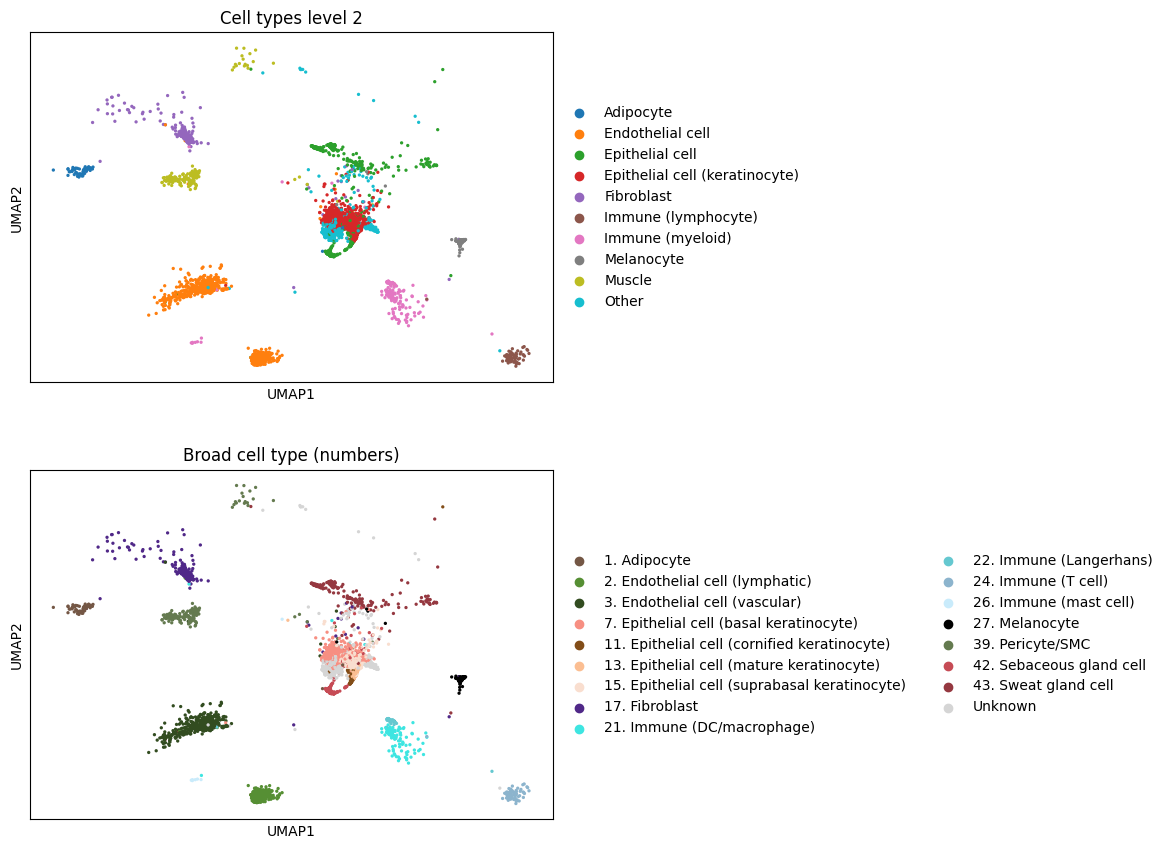

In [16]:
sc.pl.umap(gtex_skin_atlas_ref, color = ['Cell types level 2','Broad cell type (numbers)'],ncols=1)

In [17]:
sc.pp.normalize_total(gtex_skin_atlas_ref, target_sum = 1e4)
sc.pp.log1p(gtex_skin_atlas_ref)

In [18]:
sc.pp.highly_variable_genes(gtex_skin_atlas_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [21]:
model = celltypist.train(gtex_skin_atlas_ref[:, gtex_skin_atlas_ref.var.highly_variable], 'Cell types level 2', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/skin_major_from_GTEx.pkl')
model = celltypist.train(gtex_skin_atlas_ref[:, gtex_skin_atlas_ref.var.highly_variable], 'Broad cell type (numbers)', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/skin_minor_from_GTEx.pkl')

🍳 Preparing data before training
🔬 Input data has 5327 cells and 3213 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🍳 Preparing data before training
🔬 Input data has 5327 cells and 3213 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!


###### 1.4.2.1.4 Development Skin

In [35]:
import anndata as ad
import pandas as pd

In [22]:
# ref: Developmental cell programs are co-opted ininflammatory skin disease
skin_atlas_ref = sc.read_text('/home/zhepan/Reference/HealthyRef/Skin/arrayexpress_counts.txt', delimiter = '\t')

AnnData object with n_obs × n_vars = 23310 × 82228

In [24]:
skin_atlas = ad.AnnData(skin_atlas_ref)

In [29]:
skin_atlas_ref = skin_atlas.T

In [34]:
skin_atlas_ref

AnnData object with n_obs × n_vars = 82228 × 23310

In [39]:
meta = pd.read_table('/home/zhepan/Reference/HealthyRef/Skin/arrayexpress_metadata.txt', delimiter = '\t',index_col=0)

In [40]:
skin_atlas_ref.obs = skin_atlas_ref.obs.join(meta)

In [42]:
skin_atlas_ref.obs

,SampleID,Sample,Tissue_layer,Flow_gate,Cell_group,Cell_type
s1_Derm_Fibro_AAACCTGAGACTCGGA,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAACCTGCAAAGGCGT,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAACGGGTCCAGTAGT,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAAGATGAGAGGACGG,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
s1_Derm_Fibro_AAAGATGGTTCCGGCA,4820STDY7388991,s1,Dermis,Fibroblast,Fibroblast,Fibroblast 2
...,...,...,...,...,...,...
s3_Derm_Mac_DC_ACACCCTAGCGTAATA,4820STDY7389010,s3,Dermis,Dermal myeloid,pDC,pDC
s1_Derm_Mac_DC_AGATTGCCATCAGTCA,4820STDY7388994,s1,Dermis,Dermal myeloid,Dermal APC,Migratory cDC
s3_Derm_Mac_DC_TATGCCCGTGTGAAAT,4820STDY7389010,s3,Dermis,Dermal myeloid,Dermal APC,moDC1
s1_Derm_Mac_DC_CACAGGCTCAACGGGA,4820STDY7388994,s1,Dermis,Dermal myeloid,Dermal APC,Migratory cDC


In [43]:
sc.pp.normalize_total(skin_atlas_ref, target_sum = 1e4)
sc.pp.log1p(skin_atlas_ref)

In [46]:
sc.pp.highly_variable_genes(skin_atlas_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [54]:
sampled_cell_index = celltypist.samples.downsample_adata(skin_atlas_ref, mode = 'each', n_cells = 1000, by = 'Cell_type', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

Number of downsampled cells for training: 28202


In [57]:
skin_atlas_ref[sampled_cell_index].obs.groupby('Cell_group').apply(len)

Cell_group
Dermal APC                 6755
Epidermal APC              3517
Fibroblast                 3000
ILC                         285
Keratinocyte basal         1536
Keratinocyte suprabasal    2000
Lymphatic endothelium      1517
Mast cell                   192
Melanocyte                  244
NK                         1973
Pericyte                   1000
Plasma cell                 388
Schwann                      81
Stromal Schwann             127
Tc lymphocyte              1000
Th lymphocyte              1000
Treg lymphocyte            1000
Vascular endothelium       2347
pDC                         240
dtype: int64

In [55]:
model = celltypist.train(skin_atlas_ref[sampled_cell_index, skin_atlas_ref.var.highly_variable], 'Cell_group', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/skin_minor_from_Develop.pkl')
model = celltypist.train(skin_atlas_ref[sampled_cell_index, skin_atlas_ref.var.highly_variable], 'Cell_type', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/skin_subset_from_Develop.pkl')

🍳 Preparing data before training


🔬 Input data has 28202 cells and 2330 genes
⚖️ Scaling input data
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🍳 Preparing data before training
🔬 Input data has 28202 cells and 2330 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!


###### 1.4.2.1.5 TS

In [58]:
# ref: The Tabula Sapiens A multiple-organ, single-cell transcriptomic atlas of humans
TS_skin = sc.read_h5ad('/home/zhepan/Reference/HealthyRef/TabulaSapiens/TS_Skin.h5ad')
TS_skin

AnnData object with n_obs × n_vars = 9424 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

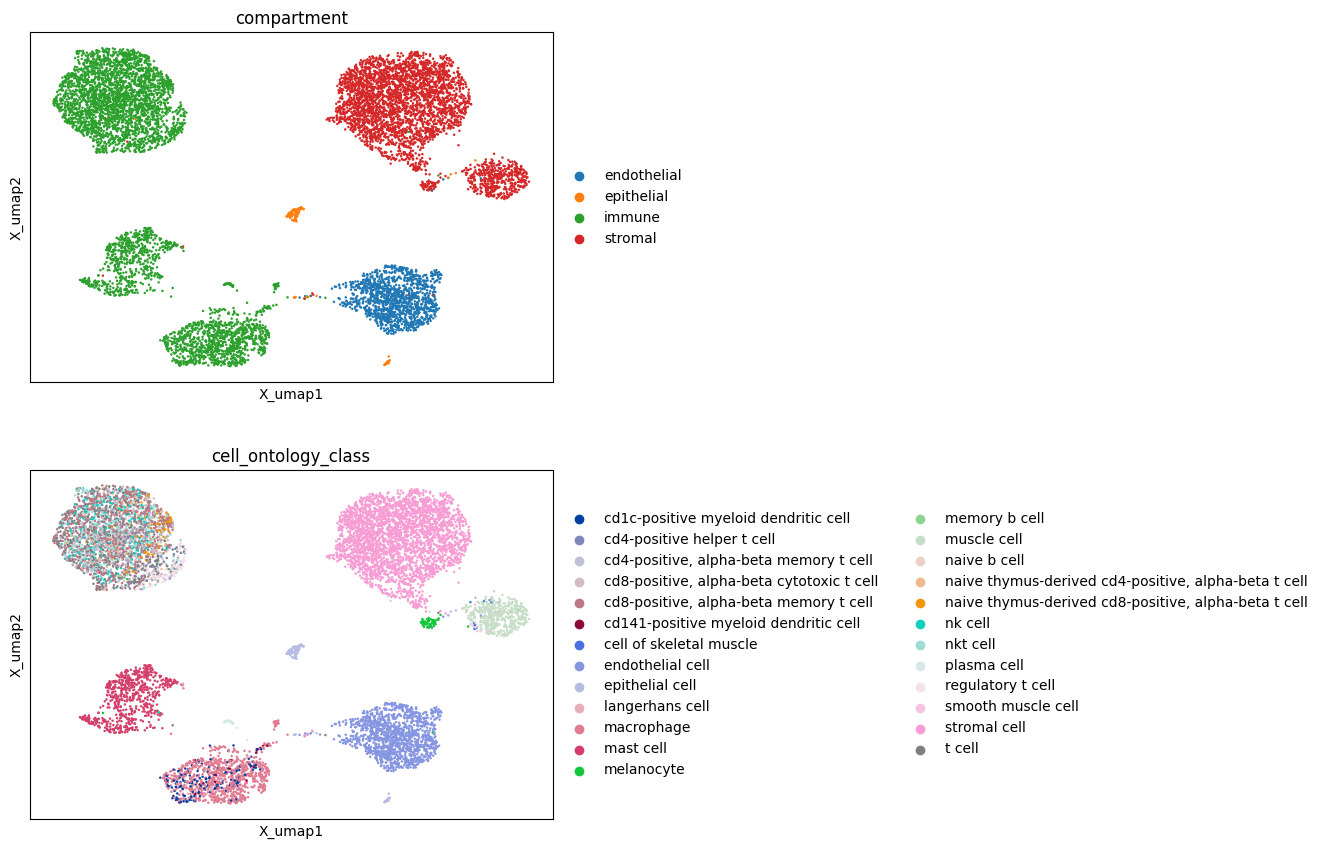

In [70]:
sc.pl.embedding(TS_skin, basis = 'X_umap', color = ['compartment', 'cell_ontology_class'],ncols=1)

In [71]:
sc.pp.normalize_total(TS_skin, target_sum = 1e4)
sc.pp.log1p(TS_skin)

In [72]:
sc.pp.highly_variable_genes(TS_skin, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [73]:
model = celltypist.train(TS_skin[:, TS_skin.var.highly_variable], 'compartment', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/skin_compartment_from_TS.pkl')
model = celltypist.train(TS_skin[:, TS_skin.var.highly_variable], 'cell_ontology_class', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/skin_subset_from_TS.pkl')

🍳 Preparing data before training
🔬 Input data has 9424 cells and 5994 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🍳 Preparing data before training
🔬 Input data has 9424 cells and 5994 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
